# Handling Missing & Outliers
In this capture, handle missing values and handle outliers values. After and before, get the accuracy of model for understanding optimization. We use the linear regression model for testing.
## Configuration / Building Spark

In [1]:
from pyspark.sql import SparkSession, functions as F
import findspark

findspark.init("C:\Program Files\Spark\spark-3.3.1-bin-hadoop3")

In [2]:
spark = SparkSession.builder \
    .appName("House Price Model") \
    .master("local[4]") \
    .config("spark.sql.shuffle.partitions", "2") \
    .getOrCreate()

### Load Dataframe

In [3]:
path = "file:///Users/talha/OneDrive/Masaüstü/Talha Nebi Kumru/Data Science/Miuul/Machine Learning/House_Price_Prediction/datasets/eda/house.parquet"
df = spark.read \
    .format("parquet") \
    .option("header", True) \
    .option("inferSchema", True) \
    .load(path)

In [4]:
df.limit(5).toPandas()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Configuration

In [5]:
from _utils._eda_utils import *

In [6]:
numerical_cols, categorical_cols = seperate_columns(df.dtypes)

2023-04-18 08:50:58,447 - _utils.logging_utils - DEBUG - seperate_columns function executing...
2023-04-18 08:50:58,450 - _utils.logging_utils - INFO - 
Numerical Columns: ['2ndFlrSF', '3SsnPorch', 'MasVnrArea', 'BedroomAbvGr', 'HalfBath', 'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF', 'YearRemodAdd', 'EnclosedPorch', 'WoodDeckSF', 'PoolArea', 'OverallQual', 'YearBuilt', 'MoSold', 'BsmtFinSF1', 'GarageCars', 'MiscVal', 'YrSold', 'GrLivArea', 'OpenPorchSF', 'FullBath', 'GarageYrBlt', 'LotArea', 'KitchenAbvGr', '1stFlrSF', 'SalePrice', 'OverallCond', 'GarageArea', 'MSSubClass', 'TotalBsmtSF', 'TotRmsAbvGrd', 'BsmtUnfSF', 'Fireplaces', 'LotFrontage', 'BsmtFullBath', 'ScreenPorch']
2023-04-18 08:50:58,450 - _utils.logging_utils - INFO - 
Categorical Columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCon

In [7]:
df.select(numerical_cols).dtypes

[('2ndFlrSF', 'int'),
 ('3SsnPorch', 'int'),
 ('MasVnrArea', 'int'),
 ('BedroomAbvGr', 'int'),
 ('HalfBath', 'int'),
 ('BsmtFinSF2', 'int'),
 ('BsmtHalfBath', 'int'),
 ('LowQualFinSF', 'int'),
 ('YearRemodAdd', 'int'),
 ('EnclosedPorch', 'int'),
 ('WoodDeckSF', 'int'),
 ('PoolArea', 'int'),
 ('OverallQual', 'int'),
 ('YearBuilt', 'int'),
 ('MoSold', 'int'),
 ('BsmtFinSF1', 'int'),
 ('GarageCars', 'int'),
 ('MiscVal', 'int'),
 ('YrSold', 'int'),
 ('GrLivArea', 'int'),
 ('OpenPorchSF', 'int'),
 ('FullBath', 'int'),
 ('GarageYrBlt', 'int'),
 ('LotArea', 'int'),
 ('KitchenAbvGr', 'int'),
 ('1stFlrSF', 'int'),
 ('SalePrice', 'int'),
 ('OverallCond', 'int'),
 ('GarageArea', 'int'),
 ('MSSubClass', 'int'),
 ('TotalBsmtSF', 'int'),
 ('TotRmsAbvGrd', 'int'),
 ('BsmtUnfSF', 'int'),
 ('Fireplaces', 'int'),
 ('LotFrontage', 'int'),
 ('BsmtFullBath', 'int'),
 ('ScreenPorch', 'int')]

In [8]:
df.select(categorical_cols).dtypes

[('MSZoning', 'string'),
 ('Street', 'string'),
 ('LotShape', 'string'),
 ('LandContour', 'string'),
 ('Utilities', 'string'),
 ('LotConfig', 'string'),
 ('LandSlope', 'string'),
 ('Neighborhood', 'string'),
 ('Condition1', 'string'),
 ('Condition2', 'string'),
 ('BldgType', 'string'),
 ('HouseStyle', 'string'),
 ('RoofStyle', 'string'),
 ('RoofMatl', 'string'),
 ('Exterior1st', 'string'),
 ('Exterior2nd', 'string'),
 ('ExterQual', 'string'),
 ('ExterCond', 'string'),
 ('Foundation', 'string'),
 ('BsmtQual', 'string'),
 ('BsmtCond', 'string'),
 ('BsmtExposure', 'string'),
 ('BsmtFinType1', 'string'),
 ('BsmtFinType2', 'string'),
 ('Heating', 'string'),
 ('HeatingQC', 'string'),
 ('CentralAir', 'string'),
 ('Electrical', 'string'),
 ('KitchenQual', 'string'),
 ('Functional', 'string'),
 ('GarageType', 'string'),
 ('GarageFinish', 'string'),
 ('GarageQual', 'string'),
 ('GarageCond', 'string'),
 ('PavedDrive', 'string'),
 ('SaleType', 'string'),
 ('SaleCondition', 'string')]

In [9]:
from _utils._missing_utils import *

In [10]:
df = configurate_missings(df)

2023-04-18 08:51:03,612 - _utils.logging_utils - DEBUG - configurate_missings function is executing...
2023-04-18 08:51:03,613 - _utils.logging_utils - INFO - MSSubClass is configurating...
2023-04-18 08:51:03,693 - _utils.logging_utils - INFO - MSZoning is configurating...
2023-04-18 08:51:03,753 - _utils.logging_utils - INFO - LotFrontage is configurating...
2023-04-18 08:51:03,811 - _utils.logging_utils - INFO - LotArea is configurating...
2023-04-18 08:51:03,861 - _utils.logging_utils - INFO - Street is configurating...
2023-04-18 08:51:03,914 - _utils.logging_utils - INFO - LotShape is configurating...
2023-04-18 08:51:03,969 - _utils.logging_utils - INFO - LandContour is configurating...
2023-04-18 08:51:04,033 - _utils.logging_utils - INFO - Utilities is configurating...
2023-04-18 08:51:04,082 - _utils.logging_utils - INFO - LotConfig is configurating...
2023-04-18 08:51:04,137 - _utils.logging_utils - INFO - LandSlope is configurating...
2023-04-18 08:51:04,197 - _utils.loggin

## Test Dataset

In [11]:
from _utils._sklearn_models import *
import warnings

warnings.simplefilter(action='ignore', category=Warning)

In [12]:
X, y = prepare_dataframe(df.toPandas().dropna(), 'SalePrice')

In [13]:
model = LinearRegressionSklearn(X, y)

In [14]:
model.init_model()

In [15]:
model.get_scores()

,0,1
5,neg_mean_squared_error,3435505342.77549
6,neg_root_mean_squared_error,55637.55986297827
7,r2,0.5030888067548825


As we see, before the handling missing r2 result is **0.5030** from cross validation.

## Missing Values

In [16]:
df.count()

1460

In [17]:
missing_values = check_missing_values(df)
missing_values

2023-04-18 08:51:45,381 - _utils.logging_utils - DEBUG - check_missing_values executing...
2023-04-18 08:51:46,638 - _utils.logging_utils - INFO - LotFrontage has 259 -  17.74 % null count.
2023-04-18 08:51:52,487 - _utils.logging_utils - INFO - MasVnrArea has 8 -  0.55 % null count.
2023-04-18 08:51:53,491 - _utils.logging_utils - INFO - BsmtQual has 37 -  2.53 % null count.
2023-04-18 08:51:53,745 - _utils.logging_utils - INFO - BsmtCond has 37 -  2.53 % null count.
2023-04-18 08:51:53,998 - _utils.logging_utils - INFO - BsmtExposure has 38 -  2.60 % null count.
2023-04-18 08:51:54,251 - _utils.logging_utils - INFO - BsmtFinType1 has 37 -  2.53 % null count.
2023-04-18 08:51:54,739 - _utils.logging_utils - INFO - BsmtFinType2 has 38 -  2.60 % null count.
2023-04-18 08:51:56,484 - _utils.logging_utils - INFO - Electrical has 1 -  0.07 % null count.
2023-04-18 08:52:00,188 - _utils.logging_utils - INFO - GarageType has 81 -  5.55 % null count.
2023-04-18 08:52:00,436 - _utils.logging_u

{2: {'column_name': 'LotFrontage',
  'null_count': 259,
  'ratio': 17.73972602739726},
 23: {'column_name': 'MasVnrArea',
  'null_count': 8,
  'ratio': 0.547945205479452},
 27: {'column_name': 'BsmtQual',
  'null_count': 37,
  'ratio': 2.5342465753424657},
 28: {'column_name': 'BsmtCond',
  'null_count': 37,
  'ratio': 2.5342465753424657},
 29: {'column_name': 'BsmtExposure',
  'null_count': 38,
  'ratio': 2.6027397260273974},
 30: {'column_name': 'BsmtFinType1',
  'null_count': 37,
  'ratio': 2.5342465753424657},
 32: {'column_name': 'BsmtFinType2',
  'null_count': 38,
  'ratio': 2.6027397260273974},
 39: {'column_name': 'Electrical',
  'null_count': 1,
  'ratio': 0.0684931506849315},
 54: {'column_name': 'GarageType',
  'null_count': 81,
  'ratio': 5.5479452054794525},
 55: {'column_name': 'GarageYrBlt',
  'null_count': 81,
  'ratio': 5.5479452054794525},
 56: {'column_name': 'GarageFinish',
  'null_count': 81,
  'ratio': 5.5479452054794525},
 59: {'column_name': 'GarageQual',
  'nul

Own method is for missing values;
* Delete missing values if ratio lower than %1.
* Fill missing values with median or mean if ratio lower than %10.
* Fill missing values with KNN imputer if ratio higher than %10.

In [18]:
delete_list = [missing_values.get(index)['column_name'] for index in missing_values 
               if missing_values.get(index)['ratio'] <= 1]

In [19]:
median_mean_list = [missing_values.get(index)['column_name'] for index in missing_values 
                   if missing_values.get(index)['ratio'] > 1 and missing_values.get(index)['ratio'] <= 10]

In [20]:
knn_imputer_list = [missing_values.get(index)['column_name'] for index in missing_values 
                   if missing_values.get(index)['ratio'] > 10]

In [21]:
len(missing_values) == len(delete_list) + len(median_mean_list) + len(knn_imputer_list)

True

### Deletion

In [22]:
df = remove_missing_values(df, delete_list)

2023-04-18 08:52:15,118 - _utils.logging_utils - DEBUG - remove_missing_values function is executing...


In [23]:
check_missing_values(df.select(delete_list))

2023-04-18 08:52:15,715 - _utils.logging_utils - DEBUG - check_missing_values executing...


{}

In [24]:
df.count()

1451

Before the deletion dataset has 1460 rows but now datasets has 1451 rows.

### Filling Mean or Mode

In [25]:
df.select(median_mean_list).dtypes

[('BsmtQual', 'string'),
 ('BsmtCond', 'string'),
 ('BsmtExposure', 'string'),
 ('BsmtFinType1', 'string'),
 ('BsmtFinType2', 'string'),
 ('GarageType', 'string'),
 ('GarageYrBlt', 'int'),
 ('GarageFinish', 'string'),
 ('GarageQual', 'string'),
 ('GarageCond', 'string')]

In [26]:
for index in missing_values:
    if missing_values.get(index)["column_name"] in median_mean_list:
        print(missing_values.get(index))

{'column_name': 'BsmtQual', 'null_count': 37, 'ratio': 2.5342465753424657}
{'column_name': 'BsmtCond', 'null_count': 37, 'ratio': 2.5342465753424657}
{'column_name': 'BsmtExposure', 'null_count': 38, 'ratio': 2.6027397260273974}
{'column_name': 'BsmtFinType1', 'null_count': 37, 'ratio': 2.5342465753424657}
{'column_name': 'BsmtFinType2', 'null_count': 38, 'ratio': 2.6027397260273974}
{'column_name': 'GarageType', 'null_count': 81, 'ratio': 5.5479452054794525}
{'column_name': 'GarageYrBlt', 'null_count': 81, 'ratio': 5.5479452054794525}
{'column_name': 'GarageFinish', 'null_count': 81, 'ratio': 5.5479452054794525}
{'column_name': 'GarageQual', 'null_count': 81, 'ratio': 5.5479452054794525}
{'column_name': 'GarageCond', 'null_count': 81, 'ratio': 5.5479452054794525}


In [27]:
mode_list = [col for col, _type in df.select(median_mean_list).dtypes if _type == 'string']

In [28]:
median_mean_list = [col for col in median_mean_list if col not in mode_list]

#### String Variables

In [29]:
df = fill_cat_with_mode(df, mode_list)

2023-04-18 08:52:29,682 - _utils.logging_utils - DEBUG - fill_cat_with_mode function is executing...
2023-04-18 08:52:29,819 - _utils.logging_utils - INFO - BsmtQual column's missing values are filled by TA
2023-04-18 08:52:29,963 - _utils.logging_utils - INFO - BsmtCond column's missing values are filled by TA
2023-04-18 08:52:30,105 - _utils.logging_utils - INFO - BsmtExposure column's missing values are filled by No
2023-04-18 08:52:30,275 - _utils.logging_utils - INFO - BsmtFinType1 column's missing values are filled by Unf
2023-04-18 08:52:30,423 - _utils.logging_utils - INFO - BsmtFinType2 column's missing values are filled by Unf
2023-04-18 08:52:30,576 - _utils.logging_utils - INFO - GarageType column's missing values are filled by Attchd
2023-04-18 08:52:30,713 - _utils.logging_utils - INFO - GarageFinish column's missing values are filled by Unf
2023-04-18 08:52:30,850 - _utils.logging_utils - INFO - GarageQual column's missing values are filled by TA
2023-04-18 08:52:30,989 

In [30]:
check_missing_values(df.select(mode_list))

2023-04-18 08:52:37,440 - _utils.logging_utils - DEBUG - check_missing_values executing...


{}

#### Integer Variables

In [31]:
df  = fill_num_with_mode(df, columns=median_mean_list)

2023-04-18 08:52:39,910 - _utils.logging_utils - DEBUG - fill_num_with_mode function is executing...
2023-04-18 08:52:40,183 - _utils.logging_utils - INFO - GarageYrBlt column's missing values are filled by 1979


In [32]:
check_missing_values(df.select(median_mean_list))

2023-04-18 08:52:42,274 - _utils.logging_utils - DEBUG - check_missing_values executing...


{}

### KNN Imputer

In [33]:
impute_model = KNNImputerSklearn(df.toPandas())

In [34]:
impute_df = impute_model.impute()

2023-04-18 08:52:53,849 - _utils.logging_utils - DEBUG - impute function is executing...
2023-04-18 08:52:53,850 - _utils.logging_utils - INFO - Dataframe is scaling...
2023-04-18 08:52:53,864 - _utils.logging_utils - INFO - Scaled Dataframe is imputing...
2023-04-18 08:52:53,976 - _utils.logging_utils - INFO - Imputed Dataframe is inversing...


### Test Non-Missing

In [35]:
X, y = prepare_dataframe(impute_df, 'SalePrice')

In [36]:
model = LinearRegressionSklearn(X, y)

In [37]:
model.init_model()

In [38]:
model.get_scores()

,0,1
5,neg_mean_squared_error,2035508708.0277286
6,neg_root_mean_squared_error,42416.143017050876
7,r2,0.6631334660159296


In [53]:
df = df.toPandas()

In [55]:
df[numerical_cols] = imputed_df[numerical_cols]

### Conclusion

<div class="alert alert-block alert-info"> <b>Final:</b> After handle the missing values, accuracy increased <b>0.5030<b> to <b>0.6631<b> </div>

## Outliers

In [56]:
df = spark.createDataFrame(df)

In [57]:
df.limit(5).toPandas()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0


In [58]:
outliers = check_outlier_values(df, numerical_cols)

2023-04-18 09:01:38,758 - _utils.logging_utils - DEBUG - check_outlier_values executing...
2023-04-18 09:01:43,429 - _utils.logging_utils - INFO - 3SsnPorch has 1 - %  0.07 outliers count.
2023-04-18 09:02:06,234 - _utils.logging_utils - INFO - PoolArea has 7 - %  0.48 outliers count.
2023-04-18 09:02:15,316 - _utils.logging_utils - INFO - BsmtFinSF1 has 1 - %  0.07 outliers count.
2023-04-18 09:02:19,853 - _utils.logging_utils - INFO - MiscVal has 8 - %  0.55 outliers count.
2023-04-18 09:02:35,716 - _utils.logging_utils - INFO - LotArea has 4 - %  0.28 outliers count.
2023-04-18 09:02:54,992 - _utils.logging_utils - INFO - TotalBsmtSF has 1 - %  0.07 outliers count.
2023-04-18 09:03:05,721 - _utils.logging_utils - INFO - LotFrontage has 2 - %  0.14 outliers count.


Outliers are under the **%1**. This means we can replace outliers with up limit and low limit threshold. I use up limit threshold as *%99* and low limit threshold as *%1*.

### Replace Outliers with Columns Thresholds

In [59]:
for out in outliers:
    print(outliers.get(out))

{'column_name': '3SsnPorch', 'outlier_count': 1, 'up_limit': 420.0, 'low_limit': -252.0, 'ratio': 0.06891798759476223}
{'column_name': 'PoolArea', 'outlier_count': 7, 'up_limit': 0.0, 'low_limit': 0.0, 'ratio': 0.4824259131633356}
{'column_name': 'BsmtFinSF1', 'outlier_count': 1, 'up_limit': 3931.25, 'low_limit': -2358.75, 'ratio': 0.06891798759476223}
{'column_name': 'MiscVal', 'outlier_count': 8, 'up_limit': 1750.0, 'low_limit': -1050.0, 'ratio': 0.5513439007580978}
{'column_name': 'LotArea', 'outlier_count': 4, 'up_limit': 91985.0, 'low_limit': -52503.0, 'ratio': 0.2756719503790489}
{'column_name': 'TotalBsmtSF', 'outlier_count': 1, 'up_limit': 5388.75, 'low_limit': -3233.25, 'ratio': 0.06891798759476223}
{'column_name': 'LotFrontage', 'outlier_count': 2, 'up_limit': 312.25, 'low_limit': -153.75, 'ratio': 0.13783597518952445}


In [61]:
from _utils._outliers_utils import *

In [62]:
for out in outliers:
    col_variable = outliers[out]
    df = replace_with_thresholds(df=df, col=col_variable['column_name'],
                                up_threshold=col_variable['up_limit'],
                                low_threshold=col_variable['low_limit'])

In [63]:
check_outlier_values(df, numerical_cols)

2023-04-18 09:04:05,863 - _utils.logging_utils - DEBUG - check_outlier_values executing...


{}

### Test Outliers

In [65]:
X, y = prepare_dataframe(df.toPandas(), 'SalePrice')

In [66]:
model = LinearRegressionSklearn(X, y)

In [67]:
model.init_model()

In [68]:
model.get_scores()

,0,1
5,neg_mean_squared_error,1182403587.4995296
6,neg_root_mean_squared_error,33290.45443377388
7,r2,0.8169383245402118


### Local Outliers

#### Preparation

In [70]:
numerical_cols = [col for col in numerical_cols if col != 'SalePrice']

In [71]:
local_df = df

#### Create Model

In [78]:
local = LocalOutliers(local_df, numerical_cols)

In [79]:
local.init_model()

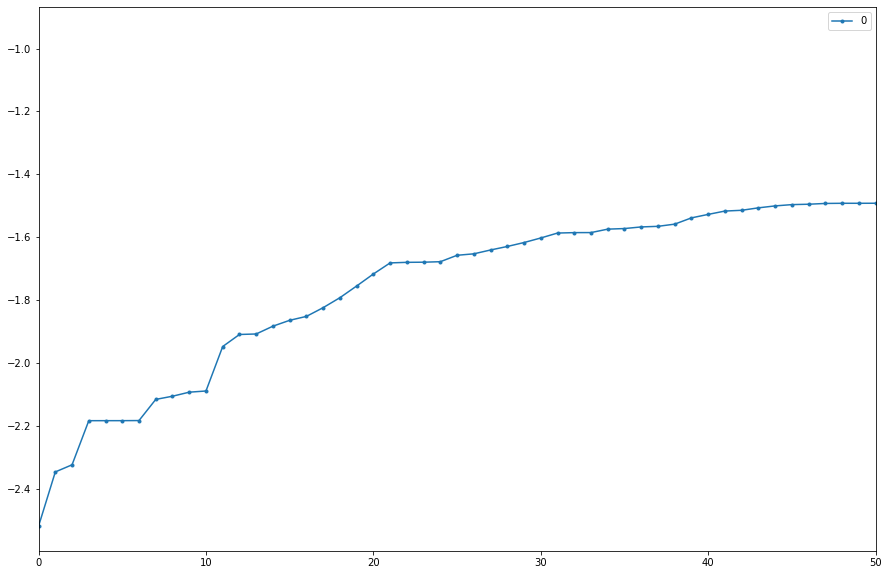

In [80]:
local.plot()

In [82]:
length = df.count()
for threshold in range(2, 25):
    local_outlier_df, non_local_outlier_df = local.get_local_outliers_df(threshold=threshold)
    
    X, y = prepare_dataframe(non_local_outlier_df, 'SalePrice')
    
    test_model = LinearRegressionSklearn(X, y)
    test_model.init_model()
    
    print(f"%{len(local_outlier_df) / length * 100: .2f} data is removed from dataset.")
    print(f"{threshold} is selected for local outliers threshold. Model Evaluation:\n")
    print(test_model.get_scores())

% 0.14 data is removed from dataset.
2 is selected for local outliers threshold. Model Evaluation:

                             0                   1
5       neg_mean_squared_error  1182652084.1871448
6  neg_root_mean_squared_error   33291.68649056329
7                           r2   0.816888884844183
% 0.21 data is removed from dataset.
3 is selected for local outliers threshold. Model Evaluation:

                             0                   1
5       neg_mean_squared_error  1186189700.0831618
6  neg_root_mean_squared_error   33340.13281712725
7                           r2  0.8161980261856134
% 0.28 data is removed from dataset.
4 is selected for local outliers threshold. Model Evaluation:

                             0                   1
5       neg_mean_squared_error  1188842352.5207474
6  neg_root_mean_squared_error   33380.39320366301
7                           r2  0.8159316885710932
% 0.34 data is removed from dataset.
5 is selected for local outliers threshold. Model E

In [83]:
local_outlier_df, non_local_outlier_df = local.get_local_outliers_df(threshold=threshold)

In [85]:
local_outlier_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
84,80.0,RL,74.2,8530.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7.0,5.0,1995.0,1996.0,Gable,CompShg,HdBoard,HdBoard,22.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,804.0,670.0,0.0,1474.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,7.0,Typ,1.0,BuiltIn,1995.0,Fin,2.0,400.0,TA,TA,Y,120.0,72.0,0.0,0.0,0.0,0.0,700.0,5.0,2009.0,WD,Normal,168500.0
248,50.0,RL,80.4,91985.0,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6.0,7.0,1958.0,2006.0,Gable,CompShg,Wd Sdng,HdBoard,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444.0,700.0,0.0,2144.0,0.0,1.0,2.0,0.0,4.0,1.0,Gd,7.0,Typ,2.0,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0.0,98.0,0.0,0.0,0.0,0.0,500.0,6.0,2007.0,WD,Normal,277000.0
296,60.0,FV,66.0,7399.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7.0,5.0,1997.0,1998.0,Hip,CompShg,VinylSd,VinylSd,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649.0,Unf,0.0,326.0,975.0,GasA,Ex,Y,SBrkr,975.0,975.0,0.0,1950.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1997.0,RFn,2.0,576.0,TA,TA,Y,0.0,10.0,0.0,0.0,198.0,0.0,0.0,6.0,2007.0,WD,Normal,239000.0
312,20.0,RL,150.0,91985.0,Pave,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7.0,5.0,1965.0,1965.0,Hip,CompShg,BrkFace,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236.0,Rec,820.0,80.0,2136.0,GasW,TA,Y,SBrkr,2036.0,0.0,0.0,2036.0,2.0,0.0,2.0,0.0,3.0,1.0,TA,8.0,Typ,2.0,Attchd,1965.0,RFn,2.0,513.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0,WD,Normal,375000.0
321,60.0,RL,86.0,10380.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7.0,5.0,1986.0,1987.0,Gable,CompShg,Plywood,Plywood,172.0,Gd,TA,CBlock,TA,TA,Gd,LwQ,28.0,ALQ,1474.0,0.0,1502.0,GasA,Ex,Y,SBrkr,1553.0,1177.0,0.0,2730.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,8.0,Typ,1.0,Attchd,1987.0,Fin,2.0,576.0,TA,TA,Y,201.0,96.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,WD,Normal,301000.0


In [88]:
df = non_local_outlier_df

### Save

In [89]:
df.to_parquet("datasets/outliers/non_outliers.parquet", index=False)

In [90]:
spark.stop()

### Conclusion

<div class="alert alert-block alert-info"> <b>Final:</b> After handle the outliers, accuracy increased <b>0.6631<b> to <b>0.8176<b> </div>

## Final Conclusion

<div class="alert alert-block alert-info"> <b>Final:</b> After handle the missing values and outlier values, accuracy increased <b>0.5030<b> to <b>0.8176<b> </div>